# Getting Started Notebook
This notebook is intended to get users started with the evaluation metrics included in the repo

In [3]:
import evaluation
import load_data
import Padgan_variants

import numpy as np
from matplotlib import pyplot as plt

2023-02-13 13:01:17.905647: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/home/mileva/Documents/Lyle/DGM-Evaluation-Metrics/Padgan_variants.py:5: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


**Calling Metrics:**

Inputs: Many metrics will only use some of the inputs and ignore the others:

    1. Generated data
    2. Performance values of generated data
    3. Dataset
    4. Performance values of dataset
    5. Constraint violating samples. 
    
Hyperparameters: Metrics are encased in a wrapper function which takes in any other metric-specific hyperparameters besides these 5 standard inputs. 

Let's intialize a function to compute F1 score in the design space. The F_wrapper function takes two arguments: 

    1. Space = "x" or "y"
    2. Subscript = Float or Int
    
In this case, we will pass in "x" to calculate the score in the design space, rather than the performance space. We will also pass in 1, since we are computing F1 score. 

In [4]:
F1_function = evaluation.F_wrapper("x", 1) 

**Training Models:**

To use our F1 function, we need something to evaluate! Lets create a dataset. We will use one of the included sampling functions. We generate 10000 2D points.

In [5]:
samplingfunction = load_data.sample_circle_blobs_wrapper(10000, 6, 1.3, 0.22)
validityfunction = load_data.all_val_wrapper()
rangearr = np.array([[-2,2], [-2,2]])
data, _ , _, _= load_data.gen_toy_dataset(samplingfunction, validityfunction, None, rangearr, 0, True)

Let's take a look at the dataset:

Data dimensionality: (10000, 2)


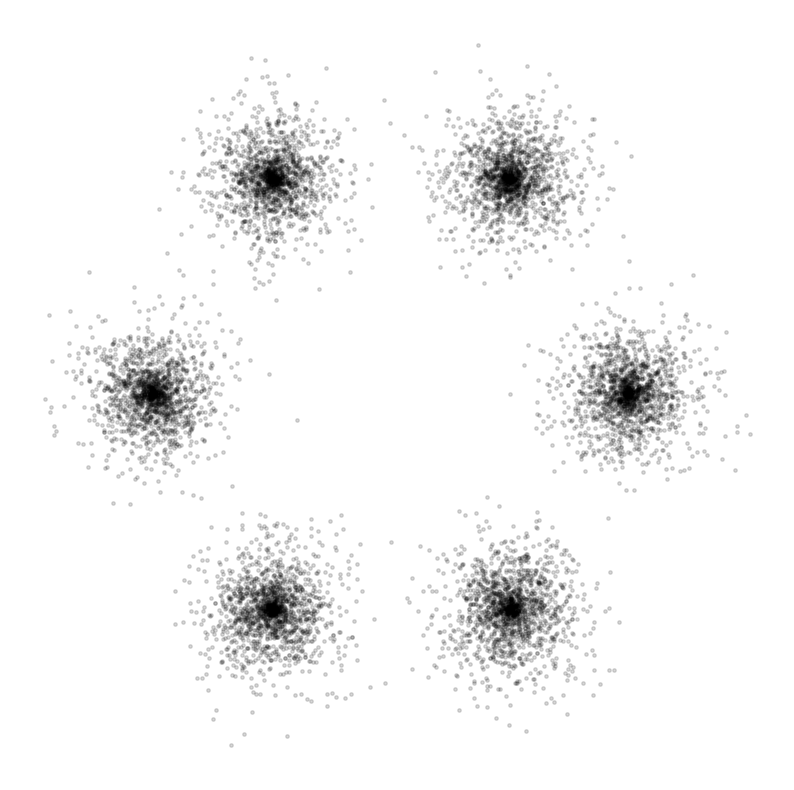

In [6]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:,0], data[:,1], s=6, c = "#000000", alpha=0.15)
plt.gca().axis('off')
print(f"Data dimensionality: {np.shape(data)}")

**Training a Model:**

Now we need to train a generative model. Let's just train up a GAN.

In [7]:
reg_clf_params = None
config_params = [False, False, False, None, None, False]
train_params = [1, 0, 4, 5000] #Setting DPP weight to 0 for normal GAN
DTAI_params= [None, None, None]
GAN_wrapper = Padgan_variants.padgan_wrapper(config_params, train_params, DTAI_params, reg_clf_params, reg_clf_params)

GAN = GAN_wrapper(data, None, None, None)
x_fake_scaled = GAN.generate(1000, None)



Lambda1 set to 0, DPP loss disabled; Ignoring CLF and REG...


2023-02-13 13:01:28.385372: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 13:01:28.402615: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 13:01:28.402814: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-02-13 13:01:28.403523: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operation

GAN Training::   0%|          | 0/5000 [00:00<?, ?it/s]

2023-02-13 13:01:30.009545: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-02-13 13:01:30.010687: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fd2885bfbb0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-02-13 13:01:30.010697: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3090 Ti, Compute Capability 8.6
2023-02-13 13:01:30.013010: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-02-13 13:01:30.058644: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-02-13 13:01:30.097836: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most

**Plotting Generated Data**
Let's plot the generated samples over the original data:

(-2.2404290143573724, 2.297026214136805, -2.390086367398911, 2.162302740493102)

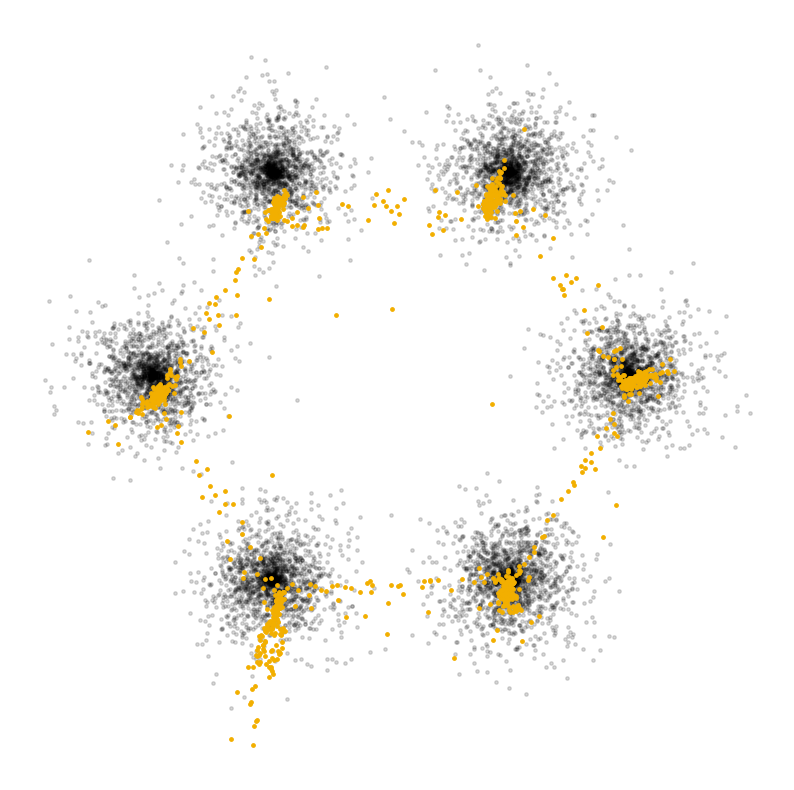

In [8]:
plt.figure(figsize=(10, 10))
plt.scatter(data[:,0], data[:,1], s=6, c = "#000000", alpha=0.15)
plt.scatter(x_fake_scaled[:,0], x_fake_scaled[:,1], s=6, c = "#F2AF00", alpha=1)
plt.gca().axis('off')

**Evaluating Generated Data**

Now let's evalaute the F1 score on our generated data: We only need to pass in the generated data and the dataset. We can leave the other three input distributions blank (None), since they will not be used to calculate F1 in the design space. Since F1 is a set metric, point_scores will be None, while set_score will contain the calculated score. 

In [9]:
point_scores, set_score = F1_function(x_fake_scaled, None, data, None, None, True)
print(f"Individual scores: {point_scores}")
print(f"F1 score: {set_score}")

Calculating F1


Calculating Precision/Recall:: 100%|============| 10/10 [00:11<00:00,  1.16s/it]

Individual scores: None
F1 score: 0.5707825884213747
